# Dashboard Scratch pad for quick testing

Note: the Airpods 3 headphone doesn't have a product description so either try to get it with the free API later or forget about it.

In [1]:
import pandas as pd
from sqlalchemy import create_engine, inspect
import ast

In [2]:
# Connection parameters
server = 'RAVI-DESKTOP\SQLEXPRESS01'
database = 'SentiRec_Analytics'
username = 'RAVI-DESKTOP\RaviB'

# Connection parameters
driver = 'ODBC+Driver+17+for+SQL+Server'  # Adjust the driver name if needed

# Create an SQLAlchemy engine
engine = create_engine(f"mssql+pyodbc://{server}/{database}?driver={driver}")

dataframes_dict = {}

try:
    # Create an inspector to inspect the database and get the tables names
    inspector = inspect(engine)
    table_names = inspector.get_table_names()

    # Load each table into a Pandas DataFrame
    for table_name in table_names:
        df = pd.read_sql_table(table_name, con=engine)
        # Display or process the DataFrame as needed
        dataframes_dict[table_name] = df
    


except pd.errors.DatabaseError as e:
    print("Error reading from the database:", e)

finally:
    # Dispose of the engine
    engine.dispose()

In [3]:
dataframes_dict.keys()

dict_keys(['amazon_product_descriptions', 'amazon_reviews_dim_table', 'averaged_embeddings', 'headphones_fact_table', 'SoundGuys_Data', 'SoundGuys_Summary_Pairs', 'yt_reviews_gen_summaries'])

In [12]:
prod_descriptions = dataframes_dict['amazon_product_descriptions']
#prod_descriptions.drop(prod_descriptions[prod_descriptions['headphoneName'] == 'AirPods 3'].index)

In [13]:
prod_descriptions.columns

Index(['headphoneName', 'URLs', 'title', 'url', 'asin', 'inStock',
       'inStockText', 'brand', 'price', 'stars', 'starsBreakdown',
       'reviewsCount', 'breadCrumbs', 'thumbnailImage', 'galleryThumbnails',
       'highResolutionImages', 'description', 'features', 'attributes',
       'productOverview', 'variantAsins', 'variantDetails', 'reviewsLink',
       'hasReviews', 'delivery', 'variantAttributes', 'manufacturerAttributes',
       'seller', 'bestsellerRanks', 'isAmazonChoice', 'amazonChoiceText',
       'locationText', 'loadedCountryCode', 'unNormalizedProductUrl'],
      dtype='object')

In [16]:
prod_descriptions['description']

0                                                  None
1                                                  None
2                                                  None
3                                                  None
4     Better sound begins with better silence. So Bo...
5     Bose QuietComfort Earbuds II are a sleek, vers...
6     ACTIVE NOISE CANCELLATION: Reduce unwanted noi...
7     Jabra Elite 7 Pro True Wireless EarbudsThe wor...
8     The TF8's stay in place during your most inten...
9     Meet Google Pixel Buds Pro, the noise-cancelin...
10    With best-in-class audio, next generation Adap...
11    LINK BUDS, TRUE WIRELESS, OPEN-RING DESIGN, AL...
12    Automate your audio experience with ultralight...
13    Sony WF-1000XM5 The Best Truly Wireless Blueto...
14    TRUE WIRELESS EARBUDS, NOISE-CANCELING, ALEXA ...
15                                                 None
Name: description, dtype: object

In [31]:
prod_descriptions = prod_descriptions[prod_descriptions['headphoneName'] != 'AirPods 3']
features = prod_descriptions['features'].apply(ast.literal_eval)

In [32]:
features[0]

['New Audio Evolution, Ultimate Music Enjoy :With LDAC technology, Consist of 10mm dynamic driver and a balanced armature, 1MORE EVO creates a new evolution in it’s wireless earbuds project. This unique acoustic cavity design can provide pure studio sound with incredible clarity, punchy bass, crispy vocals, unrivaled details and a wide soundstage which are excellent even at low volumes. And the integration of SoundID technology allows you to customize your music style.',
 'Multiple ANC Modes and Transparency Modes:While there is different kinds of scenarios when you use earphones, so 1MORE EVO supplies 4 active noise cancelling modes and 2 transparency modes in 1MORE MUSIC APP. To improve immersive enjoyment, 1MORE’s proprietary QuietMax active noise cancellation technology providing up to 42dB noise cancellation depth.',
 'Intelligently ANC Mode Adapted to Your Surroundings: When Adaptive ANC is on, the 1MORE EVO recognizes the ambient sounds intelligently, then switches the noise can

In [3]:
headphones_fact_table = dataframes_dict['headphones_fact_table']

In [4]:
headphones_fact_table.head()

,primaryKey,region,ratingScore,priceValue,priceCurrency,listPriceValue,listPriceCurrency,headphoneName,batteryLabel,batteryScore,comfortLabel,comfortScore,noisecancellationLabel,noisecancellationScore,soundqualityLabel,soundqualityScore
0,1,US,1.0,164.970001,USD,NaN,USD,sony xm4 earbuds,Negative,0.894016,Negative,0.886814,None,0.000000,None,0.000000
1,2,US,1.0,164.970001,USD,NaN,USD,sony xm4 earbuds,Positive,0.908510,Positive,0.916273,None,0.000000,Positive,0.908909
2,3,US,1.0,164.970001,USD,NaN,USD,sony xm4 earbuds,Negative,0.499079,None,0.000000,Negative,0.517302,None,0.000000
3,4,US,1.0,164.970001,USD,NaN,USD,sony xm4 earbuds,Negative,0.867483,None,0.000000,Negative,0.843609,None,0.000000
4,5,US,1.0,164.970001,USD,NaN,USD,sony xm4 earbuds,Negative,0.885287,None,0.000000,Negative,0.832005,Negative,0.846645


In [13]:
headphones_fact_table.shape
(headphones_fact_table['batteryScore'] == 0).sum()

1010

In [5]:
battery_df = headphones_fact_table[['headphoneName', 'batteryLabel', 'batteryScore']].loc[headphones_fact_table['batteryScore'] != 0]
battery_df.shape

(476, 3)

In [21]:
battery_df = headphones_fact_table[['headphoneName', 'batteryLabel', 'batteryScore']]
battery_df = battery_df[battery_df['batteryScore'] != 0]
assert (battery_df['batteryScore'] == 0).sum() == 0
battery_df.shape

(476, 3)

In [19]:
assert (battery_df['batteryScore'] == 0).sum() == 0, "There are zero values in the 'batteryScore' column."

In [22]:
noisecancellation_df = headphones_fact_table[['headphoneName', 
                                              'noisecancellationLabel', 
                                              'noisecancellationScore']
                                            ].loc[headphones_fact_table['noisecancellationScore'] != 0]

In [33]:
noisecancellation_df[noisecancellation_df['noisecancellationLabel'] == 'Neutral']

,headphoneName,noisecancellationLabel,noisecancellationScore
1252,Soundcore Liberty 3,Neutral,0.941952


In [9]:
battery_df[battery_df['headphoneName'] == 'sony xm4 earbuds']
battery_df.groupby(['headphoneName', 'batteryLabel']).mean()

batteryScore
headphoneName               batteryLabel              
1MORE Evo                   Negative          0.769466
                            Positive          0.865957
AirPods 3                   Negative          0.887797
                            Positive          0.840079
AirPods Pro 2 Earbuds       Negative          0.838483
                            Positive          0.902657
Beats Fit Pro Earbuds       Negative          0.872616
                            Neutral           0.371096
                            Positive          0.821054
Bose Quietcomfort Earbuds   Negative          0.809765
                            Positive          0.790599
Bose Quietcomfort Earbuds 2 Negative          0.792137
                            Positive          0.799833
Galaxy Buds2 Pro            Negative          0.897082
                            Positive          0.823262
Jabra Elite 7 Pro           Negative          0.804701
                            Positive          0.838446
Pixel Buds Pro              Negative          0.786385
                            Neutral           0.456170
                            Positive          0.839263
Sennheiser MTW3             Negative          0.830954
                            Positive          0.727581
Sony Linkbuds S             Negative          0.828472
                            Positive          0.762581
Sony Linkbuds original      Negative          0.791140
                            Positive          0.751124
Sony WF-1000XM5             Negative          0.828710
                            Neutral           0.768681
                            Positive          0.863777
Soundcore Liberty 3         Negative          0.853249
                            Neutral           0.553545
                            Positive          0.830641
lg tone tf8                 Negative          0.574770
                            Positive          0.932193
sony xm4 earbuds            Negative          0.835615
                            Positive          0.793415

In [16]:
battery_df[battery_df['batteryLabel'] == 'Positive']

,batteryLabel,batteryScore
1,Positive,0.908510
10,Positive,0.958688
11,Positive,0.799859
15,Positive,0.982470
16,Positive,0.929207
...,...,...
1452,Positive,0.996748
1459,Positive,0.807490
1460,Positive,0.966179
1470,Positive,0.526243


In [41]:
filtered_df = battery_df[battery_df['headphoneName'] == '1MORE Evo']

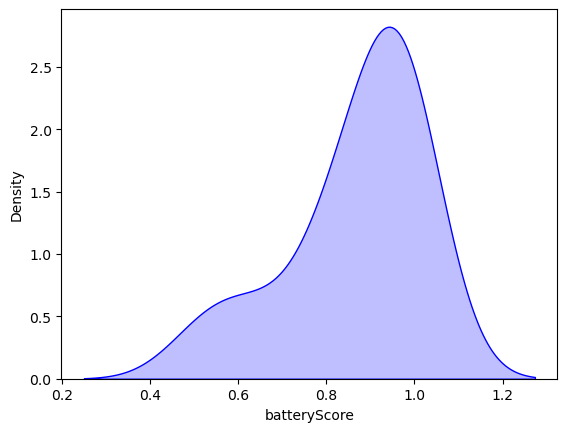

In [46]:
import seaborn as sns
selected_aspect = 'battery'
scatter_data = filtered_df[filtered_df[f'{selected_aspect}Label'] == 'Positive']
sns_kde = sns.kdeplot(scatter_data[f'{selected_aspect}Score'], color='blue', fill=True, common_norm=False, legend=False)

array([0.32941633, 0.33394577, 0.33847521, 0.34300465, 0.34753409,
       0.35206352, 0.35659296, 0.3611224 , 0.36565184, 0.37018128,
       0.37471072, 0.37924016, 0.3837696 , 0.38829904, 0.39282848,
       0.39735792, 0.40188736, 0.4064168 , 0.41094624, 0.41547568,
       0.42000512, 0.42453456, 0.42906399, 0.43359343, 0.43812287,
       0.44265231, 0.44718175, 0.45171119, 0.45624063, 0.46077007,
       0.46529951, 0.46982895, 0.47435839, 0.47888783, 0.48341727,
       0.48794671, 0.49247615, 0.49700559, 0.50153502, 0.50606446,
       0.5105939 , 0.51512334, 0.51965278, 0.52418222, 0.52871166,
       0.5332411 , 0.53777054, 0.54229998, 0.54682942, 0.55135886,
       0.5558883 , 0.56041774, 0.56494718, 0.56947662, 0.57400606,
       0.57853549, 0.58306493, 0.58759437, 0.59212381, 0.59665325,
       0.60118269, 0.60571213, 0.61024157, 0.61477101, 0.61930045,
       0.62382989, 0.62835933, 0.63288877, 0.63741821, 0.64194765,
       0.64647709, 0.65100652, 0.65553596, 0.6600654 , 0.66459

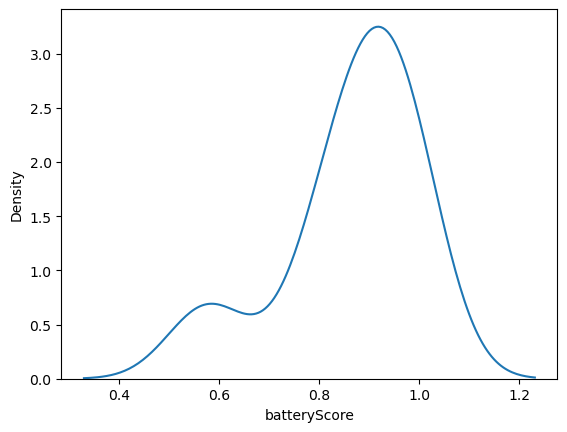

In [36]:
my_kde = kdeplot(scatter_data[f'{selected_aspect}Score'], fill=True, common_norm=False, legend=False)
my_kde.get_lines()[0].get_xdata()

In [15]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
            x=sns_kde.get_lines()[0].get_xdata(),
            #x=scatter_data[f'{selected_aspect}Score'],
            y=sns_kde.get_lines()[0].get_ydata(),
            mode='lines',
            name=sentiment_label,
            line=dict(color=color, width=2),
            opacity=0.7
        ))

IndexError: list index out of range

### Exploring Headphone Images

In [33]:
from PIL import Image
import ast
import requests
from io import BytesIO
from IPython.display import Image, display

In [31]:
url = ast.literal_eval(prod_descriptions['highResolutionImages'][0])[0]

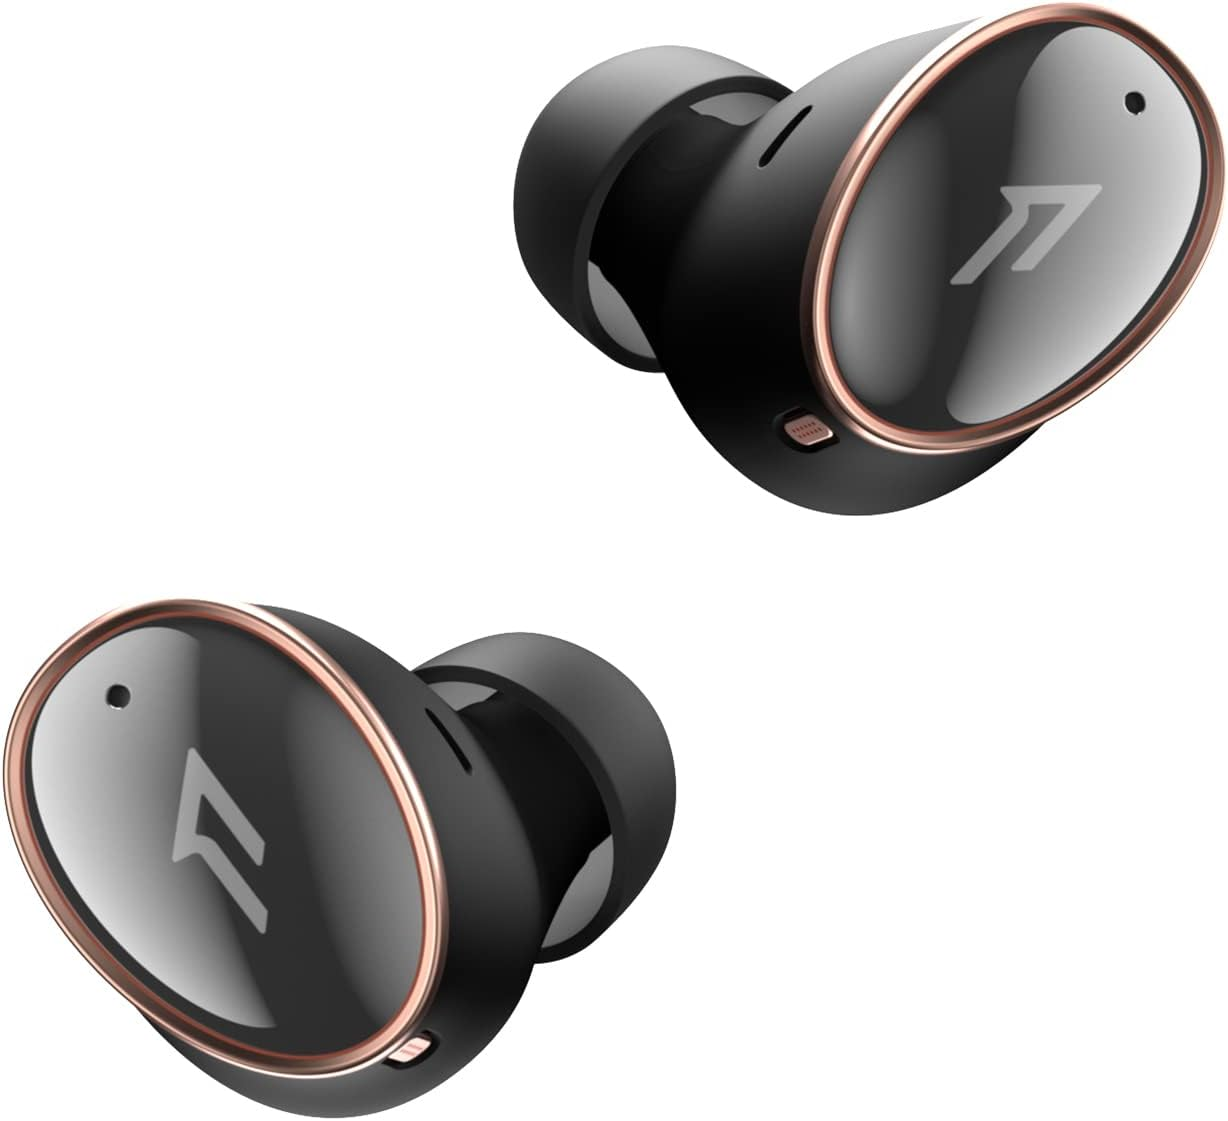

In [36]:
response = requests.get(url)
display(Image(response.content))